<a href="https://colab.research.google.com/github/SeyedJalaleddinMousavirad/Pytorch/blob/main/Pytorch_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

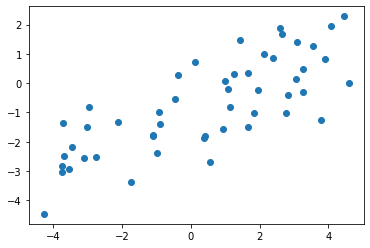

In [14]:
#The number of data points
N=50

#Generate random data on the x-axis in (-5,5)
X=np.random.rand(N)*10-5

Y=0.5*X-1+np.random.randn(N)

plt.scatter(X,Y)

Pytorch Step

In [18]:
X.size

50

In [22]:
#Create the linear regression model
model=nn.Linear(1,1)

#Loss and Optimiser
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#Reshape
X = X.reshape(N,1)
Y= Y.reshape(N,1)

#The dataset should be (number of samples, number of dimensions)

inputs=torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [20]:
type(inputs)

torch.Tensor

In [21]:
type(targets)

torch.Tensor

In [23]:
#Train the model
n_epochs=30
losses = []
for it in range(n_epochs):
  #Zero the parameter gradients 
  optimizer.zero_grad()

  #Forward pass
  outputs = model (inputs)
  loss = criterion (outputs, targets)

  #Save the losses
  losses.append(loss.item())
  
  #Backward pass
  loss.backward()
  optimizer.step()

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item(): .4f} ')


Epoch 1/30, Loss:  2.8081 
Epoch 2/30, Loss:  2.1374 
Epoch 3/30, Loss:  1.7308 
Epoch 4/30, Loss:  1.4716 
Epoch 5/30, Loss:  1.3041 
Epoch 6/30, Loss:  1.1956 
Epoch 7/30, Loss:  1.1252 
Epoch 8/30, Loss:  1.0796 
Epoch 9/30, Loss:  1.0500 
Epoch 10/30, Loss:  1.0308 
Epoch 11/30, Loss:  1.0184 
Epoch 12/30, Loss:  1.0103 
Epoch 13/30, Loss:  1.0051 
Epoch 14/30, Loss:  1.0017 
Epoch 15/30, Loss:  0.9995 
Epoch 16/30, Loss:  0.9980 
Epoch 17/30, Loss:  0.9971 
Epoch 18/30, Loss:  0.9965 
Epoch 19/30, Loss:  0.9961 
Epoch 20/30, Loss:  0.9959 
Epoch 21/30, Loss:  0.9957 
Epoch 22/30, Loss:  0.9956 
Epoch 23/30, Loss:  0.9955 
Epoch 24/30, Loss:  0.9955 
Epoch 25/30, Loss:  0.9954 
Epoch 26/30, Loss:  0.9954 
Epoch 27/30, Loss:  0.9954 
Epoch 28/30, Loss:  0.9954 
Epoch 29/30, Loss:  0.9954 
Epoch 30/30, Loss:  0.9954 


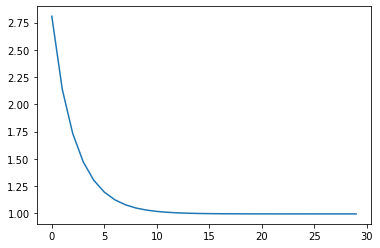

In [24]:
#Plot the losses
plt.plot(losses)

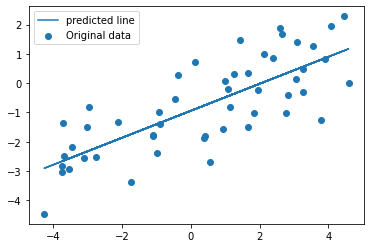

In [27]:
#plot the graph
predicted = model (inputs).detach().numpy()
plt.scatter (X,Y,label='Original data')
plt.plot(X,predicted, label = 'predicted line')
plt.legend()
plt.show()

In [29]:
#In the above code, we use detach. Instead, we can use the following way
with torch.no_grad():
  out = model(inputs).numpy()
out  

array([[-0.04476988],
       [ 1.1687996 ],
       [-0.67965806],
       [-1.367753  ],
       [-2.338006  ],
       [-1.7421316 ],
       [-0.36896396],
       [-1.3484716 ],
       [-2.6620872 ],
       [-1.9169979 ],
       [-2.3013895 ],
       [-2.9047809 ],
       [ 0.03387696],
       [-0.75132245],
       [-1.4544955 ],
       [-1.4468967 ],
       [ 0.8535659 ],
       [ 0.68934447],
       [-0.88353497],
       [ 1.1100588 ],
       [-1.3966043 ],
       [-0.4429332 ],
       [-0.17572838],
       [-2.6464896 ],
       [ 0.36225206],
       [-0.48991603],
       [ 0.15917677],
       [ 0.25372893],
       [-1.1124828 ],
       [-2.5376005 ],
       [-0.50812364],
       [ 0.46729726],
       [-2.6427937 ],
       [-0.28221756],
       [ 0.3332824 ],
       [-0.17246896],
       [ 0.8045139 ],
       [-2.5739608 ],
       [-0.76492274],
       [-2.3733115 ],
       [-2.206192  ],
       [-2.664603  ],
       [-0.42210162],
       [ 0.5655766 ],
       [ 0.48346657],
       [-0

In [31]:
#Now, we aim to take into conideration the effectiveness of the model. We know that the correct answer is : (w,b)=(0.5,-1)

w=model.weight.data.numpy()
b=model.bias.data.numpy()
print(w,b)

[[0.4601313]] [-0.9401384]
